# Importing all necessary library

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#print("Number of Gpu available:", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Data preparation

In [3]:
#organizing data so that it can be trained, tested and validated.
#we are using 50% of the data for training 25% for testing and 25% for validating
#From a total of 13482 image data we are splitting them using random function.
os.chdir('alldata/')
if os.path.isdir('train/lung') is False:
    os.makedirs('train/lung')
    os.makedirs('train/nsclc')
    os.makedirs('valid/lung')
    os.makedirs('valid/nsclc')
    os.makedirs('test/lung')
    os.makedirs('test/nsclc')
    
    for c in random.sample(glob.glob('lung*'), 3370):
        shutil.move(c, 'train/lung')
    for c in random.sample(glob.glob('nsclc*'), 3370):
        shutil.move(c, 'train/nsclc')
    for c in random.sample(glob.glob('lung*'), 1686):
        shutil.move(c, 'valid/lung')
    for c in random.sample(glob.glob('nsclc*'), 1686):
        shutil.move(c, 'valid/nsclc')
    for c in random.sample(glob.glob('lung*'), 1685):
        shutil.move(c, 'test/lung')
    for c in random.sample(glob.glob('nsclc*'), 1685):
        shutil.move(c, 'test/nsclc')
        
os.chdir('../')

In [4]:
train_path = 'alldata/train'
valid_path = 'alldata/valid'
test_path = 'alldata/test'

In [5]:
#before the compilation of the model images are being processed so that the model can process accordingly.
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(224,224), classes=['lung','nsclc'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=valid_path, target_size=(224,224), classes=['lung','nsclc'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=test_path, target_size=(224,224), classes=['lung','nsclc'], batch_size=10, shuffle=False)


Found 6740 images belonging to 2 classes.
Found 3372 images belonging to 2 classes.
Found 3370 images belonging to 2 classes.


In [6]:
#validating all the images are in the directory as desired
assert train_batches.n == 6740
assert valid_batches.n == 3372
assert test_batches.n == 3370
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes ==2

In [7]:
imgs, labels = next(train_batches)

In [8]:
#this function is directly from tensorflow
#This function will plot images in a grid from with 1 row & 10 column
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

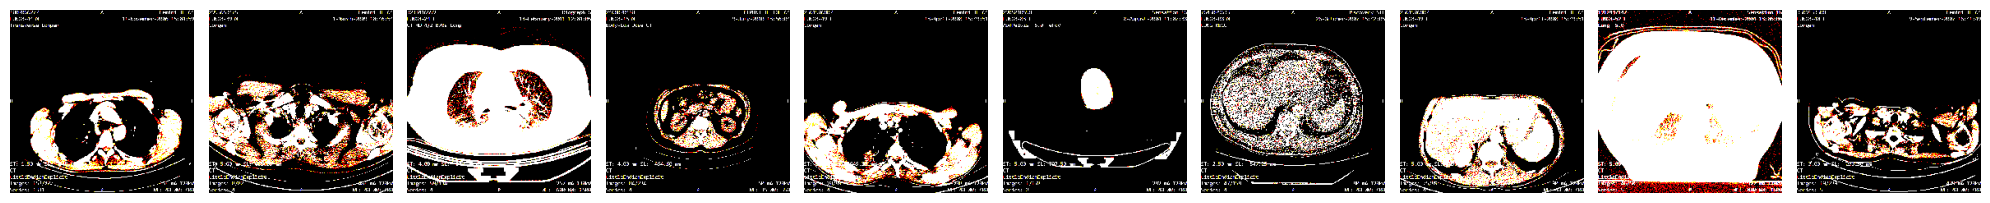

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [9]:
plotImages(imgs)
print(labels)

# Building and training the CNN model

In [10]:
#setting image size into 224x224 and also setting color model to 3.
#For output layer we used softmax activation function
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [12]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [13]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
674/674 - 205s - loss: 3.8488 - accuracy: 0.8473 - val_loss: 0.5939 - val_accuracy: 0.9122 - 205s/epoch - 304ms/step
Epoch 2/10
674/674 - 120s - loss: 0.1045 - accuracy: 0.9761 - val_loss: 0.1472 - val_accuracy: 0.9644 - 120s/epoch - 178ms/step
Epoch 3/10
674/674 - 120s - loss: 0.0733 - accuracy: 0.9807 - val_loss: 0.1685 - val_accuracy: 0.9552 - 120s/epoch - 177ms/step
Epoch 4/10
674/674 - 121s - loss: 0.0157 - accuracy: 0.9951 - val_loss: 0.2339 - val_accuracy: 0.9626 - 121s/epoch - 179ms/step
Epoch 5/10
674/674 - 118s - loss: 0.0142 - accuracy: 0.9953 - val_loss: 0.1544 - val_accuracy: 0.9683 - 118s/epoch - 175ms/step
Epoch 6/10
674/674 - 118s - loss: 0.0622 - accuracy: 0.9858 - val_loss: 0.1911 - val_accuracy: 0.9534 - 118s/epoch - 176ms/step
Epoch 7/10
674/674 - 120s - loss: 0.0110 - accuracy: 0.9964 - val_loss: 0.1749 - val_accuracy: 0.9656 - 120s/epoch - 177ms/step
Epoch 8/10
674/674 - 120s - loss: 0.0117 - accuracy: 0.9958 - val_loss: 0.3309 - val_accuracy: 0.9413 - 

# Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

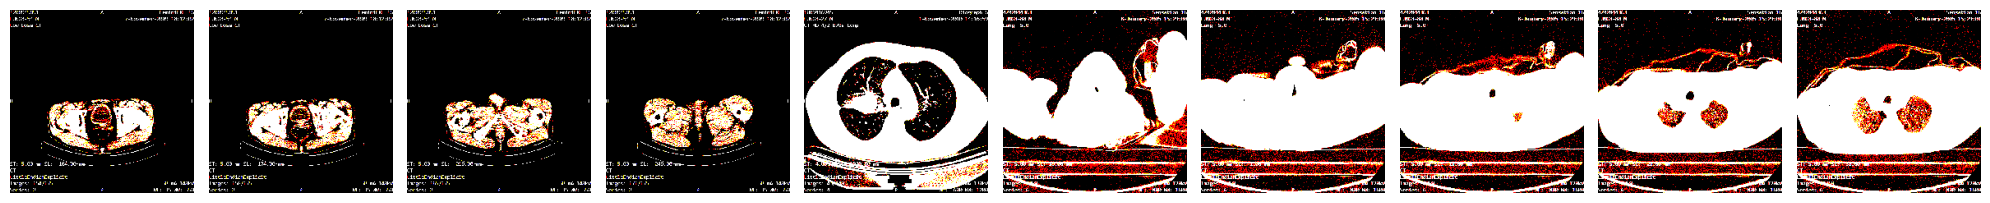

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [14]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [15]:
test_batches.classes

array([0, 0, 0, ..., 1, 1, 1])

In [16]:
predictions = model.predict(x=test_batches, verbose=0)

In [17]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [18]:
cm= confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [19]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum (axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')
    
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
test_batches.class_indices

{'lung': 0, 'nsclc': 1}

Confusion Matrix, without normalization
[[1610   75]
 [  27 1658]]


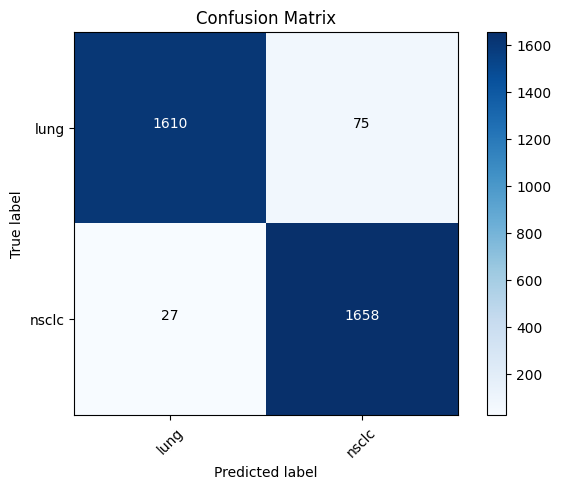

In [24]:
cm_plot_labels = ['lung', 'nsclc']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

From the confusion matrix it can be seen that from a total of 3370 sample the model correctly predicted 3268 samples incorrectly predicted 102 samples.